In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
import datetime
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [151]:
#Load Train Data
df_ = pd.read_csv("data/train_out.csv")
df = df_.copy()

df = df.set_index('game_id')
df = df.sort_values(by=['Year','Season_Encode'])

X = df.drop('bResult', axis=1)
y = df['bResult']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [152]:
#Load Test Data
data_sub = pd.read_csv("data/test_out.csv")
data_sub_ = data_sub.copy()

data_sub_ = data_sub_.set_index('game_id')
X_sub = data_sub_

#Linear Regression

# Logistic Regression

In [153]:
from sklearn.linear_model import LogisticRegression

#Fit model
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

LogisticRegression()

In [154]:
#Score Model
y_pred = clf_lr.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred.flatten())
roc_auc

0.6566452701219134

In [155]:
def bet(row):
    if (row['bResult_prob_Loss'] < 0) & (row['bResult_prob_Win'] < 0) :
        return 'NO BET'
    else:
        if row['bResult'] == 1:
            return "WIN"
        else:
            return 'LOSS'

In [156]:
#Generate predictions
probs = clf_lr.predict_proba(X_sub)
predict = clf_lr.predict(X_sub)
X_final = X_sub.copy()

X_final['bResult_prob_Loss']=probs[:,0]
X_final['bResult_prob_Win']=probs[:,1]
X_final['bResult']=predict


X_final['bet'] = X_final.apply(lambda row: bet(row), axis=1)
X_final.bet.value_counts()
X_final['bet'].to_csv('data/Submission_LR.csv')

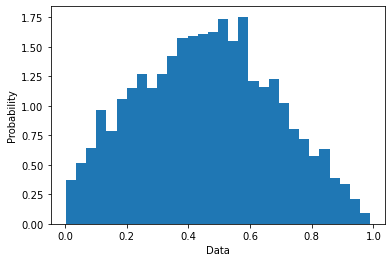

In [139]:
plt.hist(X_final['bResult_prob_Loss'], density=True, bins=30)  # `density=False` would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

# DecisionTreeClassifier

In [140]:
from sklearn.tree import DecisionTreeClassifier

#Fit model
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [141]:
#Score Model
y_pred = clf_dt.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred.flatten())
roc_auc

0.58934988120602

In [142]:
#Generate predictions
probs = clf_dt.predict_proba(X_sub)
predict = clf_dt.predict(X_sub)
X_final = X_sub.copy()

X_final['bResult_prob_Loss']=probs[:,0]
X_final['bResult_prob_Win']=probs[:,1]
X_final['bResult']=predict


X_final['bet'] = X_final.apply(lambda row: bet(row), axis=1)
X_final.bet.value_counts()
X_final['bet'].to_csv('data/Submission_DT.csv')

WIN     1959
LOSS    1593
Name: bet, dtype: int64

# GradientBoostingClassifier

In [143]:
from sklearn.ensemble import GradientBoostingClassifier

#Fit modelhttp://localhost:8888/notebooks/S02%20-%20Data%20Wrangling/HCKT02%20-%20Data%20Wrangling/Model.ipynb#GradientBoostingClassifier
clf_gd = GradientBoostingClassifier()
clf_gd.fit(X_train, y_train)


GradientBoostingClassifier()

In [144]:
#Score Model
y_pred = clf_gd.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred.flatten())
roc_auc

0.6535993288783698

In [145]:
#Generate predictions
probs = clf_gd.predict_proba(X_sub)
predict = clf_gd.predict(X_sub)
X_final = X_sub.copy()

X_final['bResult_prob_Loss']=probs[:,0]
X_final['bResult_prob_Win']=probs[:,1]
X_final['bResult']=predict


X_final['bet'] = X_final.apply(lambda row: bet(row), axis=1)
X_final.bet.value_counts()
X_final['bet'].to_csv('data/Submission_GD.csv')

WIN     1975
LOSS    1577
Name: bet, dtype: int64

In [146]:
feature_importances = pd.Series(data=clf_gd.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False)

blue_gold              0.366960
red_gold               0.330559
gamelength             0.164663
total_kills_r_team     0.054195
total_kills_b_team     0.027467
total_towers_b_team    0.020393
total_monsters_a       0.019804
total_towers_r_team    0.008181
total_monsters_b       0.003960
Season_Encode          0.002768
Year                   0.001049
dtype: float64

# RandomForestClassifier

In [147]:
from sklearn.ensemble import RandomForestClassifier

#Fit model
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)


RandomForestClassifier()

In [148]:
#Score Model
y_pred = clf_rf.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred.flatten())
roc_auc

0.6498303267629435

In [149]:
#Generate predictions
probs = clf_rf.predict_proba(X_sub)
predict = clf_rf.predict(X_sub)
X_final = X_sub.copy()

X_final['bResult_prob_Loss']=probs[:,0]
X_final['bResult_prob_Win']=probs[:,1]
X_final['bResult']=predict


X_final['bet'] = X_final.apply(lambda row: bet(row), axis=1)
X_final.bet.value_counts()
X_final['bet'].to_csv('data/Submission_RF.csv')

WIN     1855
LOSS    1697
Name: bet, dtype: int64